In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



In [ ]:
df=pd.read_csv('basic_edu.csv')

In [87]:
df.head()

,Entity,Code,Year,Share of population with no education,Share of population with at least some basic education
0,Argentina,ARG,1950,14.211617,85.788380
1,Argentina,ARG,1955,12.431603,87.568400
2,Argentina,ARG,1960,10.859231,89.140770
3,Argentina,ARG,1965,9.377147,90.622856
4,Argentina,ARG,1970,8.031716,91.968285


In [ ]:
df.tail() #There are OWID_WRL so I want to substract them.

,Entity,Code,Year,Share of population with no education,Share of population with at least some basic education
810,World,OWID_WRL,2080,3.123006,96.876990
811,World,OWID_WRL,2085,2.709299,97.290700
812,World,OWID_WRL,2090,2.354454,97.645546
813,World,OWID_WRL,2095,2.051334,97.948670
814,World,OWID_WRL,2100,1.792332,98.207664


In [86]:
df.columns

Index(['Entity', 'Code', 'Year', 'Share of population with no education',
       'Share of population with at least some basic education'],
      dtype='object')

In [73]:
df.dtypes

Entity                                                     object
Code                                                       object
Year                                                        int64
Share of population with no education                     float64
Share of population with at least some basic education    float64
dtype: object

In [85]:
#DataImputation 
df=df.dropna()
print(df.isnull().sum())

Entity                                                    0
Code                                                      0
Year                                                      0
Share of population with no education                     0
Share of population with at least some basic education    0
dtype: int64


In [ ]:
df = df[df["Code"]!='OWID_WRL']

In [ ]:
df # I run it again so the Code change into Categories

,Entity,Code,Year,Share of population with no education,Share of population with at least some basic education
0,Argentina,1,1950,14.211617,85.788380
1,Argentina,1,1955,12.431603,87.568400
2,Argentina,1,1960,10.859231,89.140770
3,Argentina,1,1965,9.377147,90.622856
4,Argentina,1,1970,8.031716,91.968285
...,...,...,...,...,...
770,United States,24,2080,0.197939,99.802060
771,United States,24,2085,0.161452,99.838550
772,United States,24,2090,0.130904,99.869095
773,United States,24,2095,0.105897,99.894104


In [ ]:
#Data Transformation
encoder=LabelEncoder() #I want to change the Code data into numerical within their similar categories(i.e: ARG for 1 and etc)
df['Code']=encoder.fit_transform(df['Code']) + 1

/var/folders/0_/y843pf1d71n0kqm_xt460ml00000gq/T/ipykernel_41601/2151495778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Code']=encoder.fit_transform(df['Code']) + 1


In [106]:
print(df[['Code']])

     Code
0       1
1       1
2       1
3       1
4       1
..    ...
770    24
771    24
772    24
773    24
774    24

[775 rows x 1 columns]


In [107]:
df #Code change into numerical and we can see there are 24 country 

,Entity,Code,Year,Share of population with no education,Share of population with at least some basic education
0,Argentina,1,1950,14.211617,85.788380
1,Argentina,1,1955,12.431603,87.568400
2,Argentina,1,1960,10.859231,89.140770
3,Argentina,1,1965,9.377147,90.622856
4,Argentina,1,1970,8.031716,91.968285
...,...,...,...,...,...
770,United States,24,2080,0.197939,99.802060
771,United States,24,2085,0.161452,99.838550
772,United States,24,2090,0.130904,99.869095
773,United States,24,2095,0.105897,99.894104


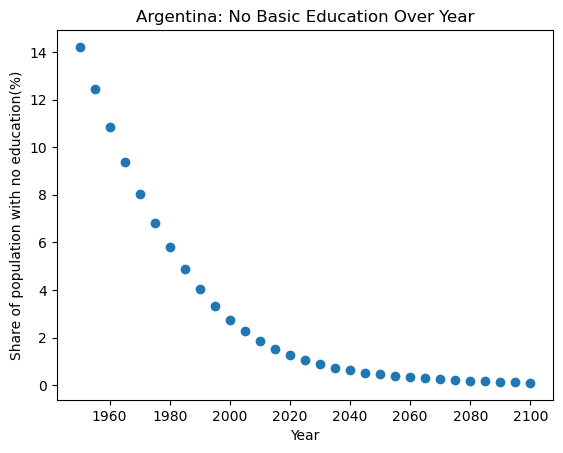

In [181]:
plt.scatter(
    df[df['Code']==1]['Year'],
    df[df['Code']==1]['Share of population with no education']
)
plt.xlabel('Year')
plt.ylabel('Share of population with no education(%)')
plt.title('Argentina: No Basic Education Over Year')
plt.show() #Here I don't know how to rematch with Code is related to which No. In this data set, it is easy to counts for 24 but for bigger dataset I don't know how to rematch it. 

<Axes: xlabel='Year', ylabel='Share of population with no education'>

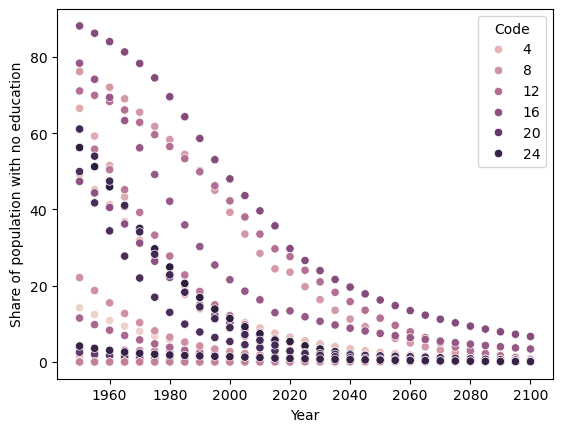

In [186]:
sns.scatterplot(x='Year', y='Share of population with no education',data=df, hue='Code')

In [187]:
#Data Standardization
x=df.drop(columns=['Entity', 'Share of population with at least some basic education'])
y=df['Share of population with at least some basic education']

In [188]:
x

,Code,Year,Share of population with no education
0,1,1950,14.211617
1,1,1955,12.431603
2,1,1960,10.859231
3,1,1965,9.377147
4,1,1970,8.031716
...,...,...,...
770,24,2080,0.197939
771,24,2085,0.161452
772,24,2090,0.130904
773,24,2095,0.105897


In [189]:
y

0      85.788380
1      87.568400
2      89.140770
3      90.622856
4      91.968285
         ...    
770    99.802060
771    99.838550
772    99.869095
773    99.894104
774    99.914920
Name: Share of population with at least some basic education, Length: 775, dtype: float64

In [196]:
X_train,X_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42)

In [148]:
X_train.shape,y_train.shape

((620, 3), (620,))

In [149]:
X_test.shape,y_test.shape

((155, 3), (155,))

In [151]:
lr=LinearRegression()
lr

LinearRegression()

In [152]:
lr.fit(X_train,y_train)

LinearRegression()

In [155]:
results=lr.predict(X_test)
results

array([99.37308014, 99.93891629, 99.54720403, 99.56362457, 99.89617728,
       99.76793168, 99.94346988, 99.99999969, 99.93540268, 99.94960585,
       99.83854835, 94.45848497, 75.59677702, 99.92764577, 99.75638515,
       99.50097157, 99.97410734, 68.02869989, 99.39003057, 72.63226288,
       98.72575412, 93.33481096, 99.91287293, 99.97197677, 99.7070066 ,
       98.85076214, 95.27364699, 23.85867001, 99.99999968, 98.39139996,
       97.29185601, 99.3291988 , 93.93856594, 90.22368024, 99.63726259,
       93.1177831 , 99.95241897, 99.95295718, 48.79163993, 98.42449284,
       89.68690479, 99.80206082, 99.96121136, 94.54767485, 98.92197608,
       99.83066648, 99.1768748 , 98.96069041, 99.83250084, 99.99999986,
       77.19109991, 99.11073524, 99.47047558, 99.99999988, 99.87665218,
       99.89963749, 80.3680501 , 99.60180289, 99.90576141, 69.74541996,
       98.08235532, 98.29559618, 98.61818543, 90.72128407, 99.93716364,
       89.75443119, 36.70473001, 66.47705505, 99.93452113, 99.99

In [190]:
mse=mean_squared_error(y_test, results)
mse

7.876444459713056e-12

In [191]:
mae=mean_absolute_error(y_test,results)
mae

2.1067700291292758e-06

In [ ]:
r2 = r2_score(y_test, results)
r2 #Better Model

0.9999999999999653